# PowerCo - Churn Analysis and Prediction


## SubTask1:- Exploratory Data Analysis and Cleaning

### Import packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## Loading data with Pandas
###### The dataset client_data.csv named as client_df contains:
    id: contact id
    channel_sales: code of the sales channel
    cons_12m: electricity consumption of the past 12 months
    cons_gas_12m: gas consumption of the past 12 months
    cons_last_month: electricity consupmtion of the last month
    date_activ: date of activation of the contract
    date_end: registered date of the end of the contract
    date_modif_prod: date of last modification of the product
    date_renewal: date of the next contract renewal
    forecast_cons_12m: forecasted electricity consumption for next 12 months
    forecast_cons_year: forecasted electricity consumption for next calendar year
    forecast_discount_energy: forecasted value of current discount
    forecast_meter_rent_12m: forecasted bill of meter rental for the next 12 months
    forecast_price_energy_p1: forecasted energy price for 1st period
    forecast_price_energy_p2: forecasted energy price for 2nd period
    forecast_price_pow_p1: forecasted power price for 1st period
    has_gas: indicated if client is also a gas client
    imp_cons: current paid consumption
    margin_gross_pow_ele: gross margin on power subscription
    margin_net_pow_ele: net margin on power subscription
    nb_prod_act: number of active products and services
    net_margin: total net margin
    num_years_antig: antiquity of the client (in number of years)
    origin_up: code of the electricity campaign the customer first subscribed to
    pow_max: subscribed power
    
###### The dataset price_data.csv named as price_df contains  the history of energy and power consumption per client:
    id: contact id
    price_date: reference date 
    price_p1_var: price of energy for the 1st period 
    price_p2_var: price of energy for the 2nd period 
    price_p3_var: price of energy for the 3rd period 
    price_p1_fix: price of power for the 1st period 
    price_p2_fix: price of power for the 2nd period 
    price_p3_fix: price of power for the 3rd period


In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

---

## Basic checks of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.


In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


You can view the first 5 rows of a dataframe using the head() method. Similarly, if you wanted to see the last 5, you can use tail() Also you can view the number of rows and columns in dataframe using shape

In [5]:
print(client_df.shape)
print(price_df.shape)

(14606, 26)
(193002, 8)


It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


To get an overview of the data types within a data frame, use the `info()` method.

## Data Cleaning

Merging Client Dataset and Price Dataset            
Merging price and client dataset using id

In [8]:
# merge two dataframe with id column.
energy_data = pd.merge(client_df, price_df, on='id')
energy_data.shape

(175149, 33)

In [9]:
# Explore new training_df
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

We can see that all the columns representing a date is not in the proper format so we should convert these to datetime format. There also seems to be some missing values in many columns. Let's explore these further.

In [10]:
#Changing datatype
energy_data = energy_data.astype({
    'date_activ' : 'datetime64',
    'date_end' : 'datetime64',
    'date_modif_prod' : 'datetime64',
    'date_renewal' : 'datetime64',
    'price_date':'datetime64'
})

In [11]:
# Stats on numeric columns
energy_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,...,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,...,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,...,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


Consumption seems to contain a few outliers that are skewing the distributions greatly. Since we are dealing with energy data, these extreme values could be normal so we cannot simply discard them.

In [12]:
# Check for duplicates
energy_data.duplicated().sum()

0

Let's now perform data validation to spot any mismatches.

In [13]:
# Data validation
consumes_gas = energy_data.cons_gas_12m > 0
not_gas_client = energy_data.has_gas == 'f'

display(energy_data[(consumes_gas) & (not_gas_client)][['cons_gas_12m', 'has_gas']].head())
display(energy_data[(consumes_gas) & (not_gas_client)].shape[0])

,cons_gas_12m,has_gas
2532,458306,f
2533,458306,f
2534,458306,f
2535,458306,f
2536,458306,f


634

There are 634 instances where a customer is not a gas client but consumes gas. This may be true for the same customer more than once. We should convert the has_gas to "true" for these customers.

In [14]:
# Convert non-gas samples that consume gas to gas clients
energy_data.loc[(consumes_gas) & (not_gas_client), 'has_gas'] = 't'

Let's now compare activation and ending dates for contracts.

In [15]:
# Compare activation and ending dates on contracts
print(f'There are {energy_data[energy_data.date_activ > energy_data.date_end].shape[0]} date contract start and end errors.')

There are 0 date contract start and end errors.


In [16]:
# Check has_gas and churn columns for inconsistency
print(energy_data.has_gas.unique())
print(energy_data.churn.unique())

['t' 'f']
[1 0]


We should convert the has_gas column into 0 for false, and 1 for true.

In [17]:
energy_data.has_gas.replace({'f':0, 't':1}, inplace=True)

## Exploratory Data Analysis

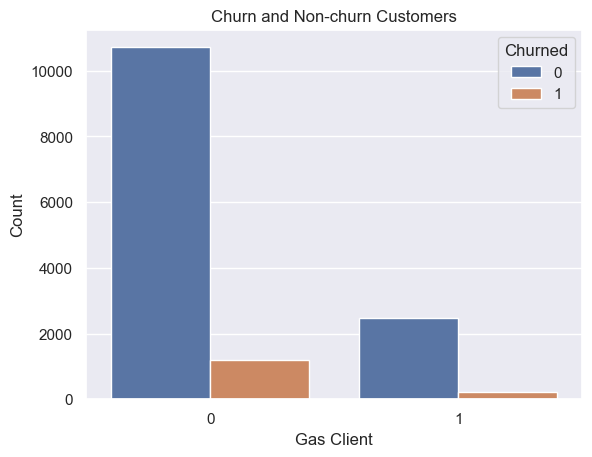

In [18]:
# Visualize churn
g = sns.countplot(x='has_gas', hue='churn', data=energy_data.drop_duplicates(subset='id'))

plt.title('Churn and Non-churn Customers')
plt.xlabel('Gas Client')
plt.ylabel('Count')
g.legend_.set_title('Churned')
plt.show()

Less than 2,000 customers out of almost 16,096 have churned. Of those, most of them tend to not be gas clients. Let's find the current churn rate.

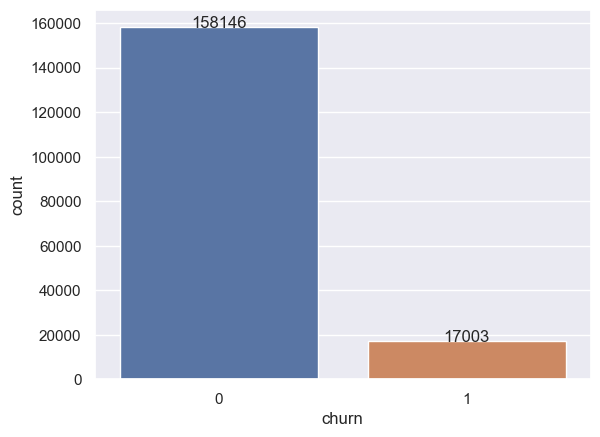

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x=energy_data['churn'])
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+40
    ax.text(X, Y, value, ha="center")
plt.show()

###### Facts:-
In the last 3 months 17,003 customers have churned                           
There are currently 1,58,146 active clients

In [20]:
# Number of churned customers
num_churned = energy_data[energy_data.churn == 1].id.nunique()

# Percent of churners
churn_rate = energy_data[energy_data.churn == 1].id.nunique() / energy_data.id.nunique()

print('The total number of churned customers is', num_churned, 'and the current churn rate is', round(churn_rate*100, 2),'%')

The total number of churned customers is 1419 and the current churn rate is 9.72 %


In [21]:
energy_data.drop_duplicates(subset='id').churn.mean()

0.09715185540188963

Almost 10% of PowerCo's clients are leaving.

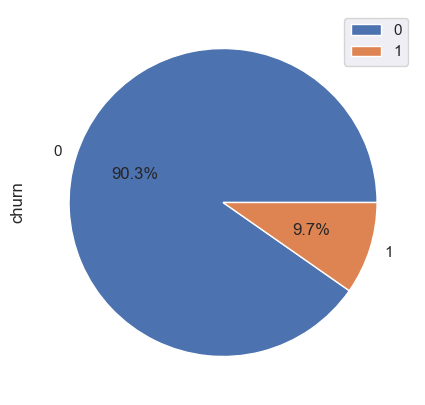

In [22]:
percent = pd.DataFrame(energy_data['churn'].value_counts(normalize=True) * 100)
plot = percent.plot.pie(y='churn', figsize=(5, 5), autopct='%1.1f%%')

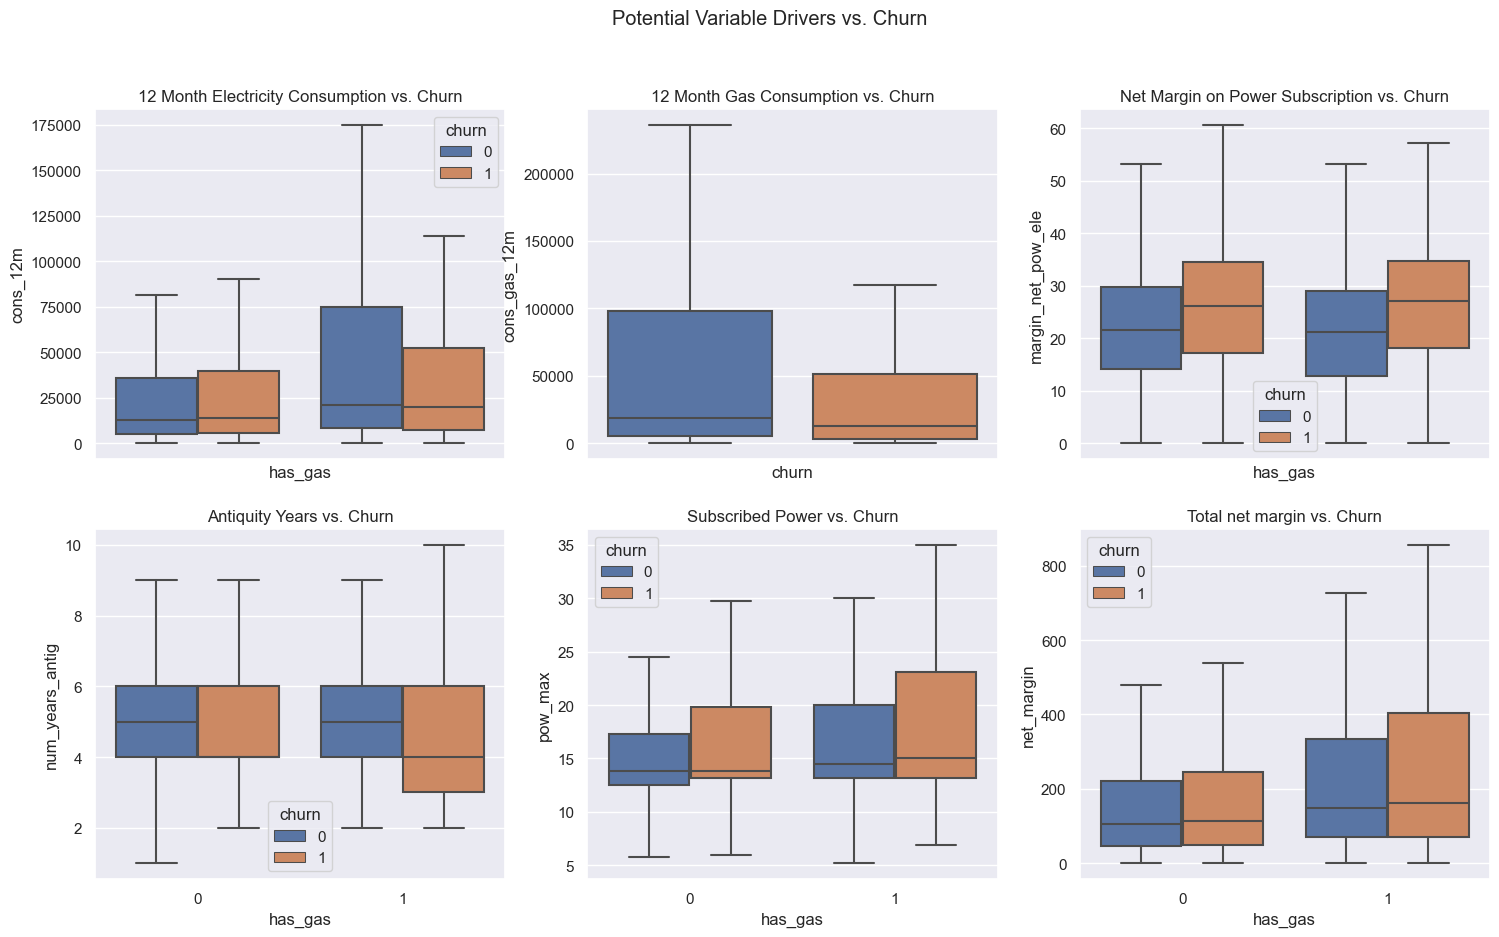

In [23]:
fig, ax = plt.subplots(2, 3, sharex=True, figsize=(18, 10))
fig.suptitle('Potential Variable Drivers vs. Churn')

sns.boxplot(x='has_gas', y='cons_12m', hue='churn', data=energy_data, sym='', ax=ax[0,0])
ax[0,0].set_title('12 Month Electricity Consumption vs. Churn')

sns.boxplot(x='churn', y='cons_gas_12m', data=energy_data.query('has_gas == 1'), sym='', ax=ax[0,1])
ax[0,1].set_title('12 Month Gas Consumption vs. Churn')

sns.boxplot(x='has_gas', y='margin_net_pow_ele', hue='churn', data=energy_data, sym='', ax=ax[0,2])
ax[0,2].set_title('Net Margin on Power Subscription vs. Churn')

sns.boxplot(x='has_gas', y='num_years_antig', hue='churn', data=energy_data, sym='', ax=ax[1,0])
ax[1,0].set_title('Antiquity Years vs. Churn')

sns.boxplot(x='has_gas', y='pow_max', hue='churn', data=energy_data, sym='', ax=ax[1,1])
ax[1,1].set_title('Subscribed Power vs. Churn')

sns.boxplot(x='has_gas', y='net_margin', hue='churn', data=energy_data, sym='', ax=ax[1,2])
ax[1,2].set_title('Total net margin vs. Churn')

plt.show()

Customers who churned have lower electricity and gas consumption levels than non-churners, except they are about even if the client does not use gas.

Customers who have a higher net margin seem to churn more. Perhaps customers are more inclined to churn if their net margin on power subscription is higher than the non-churner average? Whether or not the client uses gas does not differentiate the groups by much in this case.

There doesn't seem to be much of a difference when comparing number of antiquity and churn.

We can see that subscribed power and total net margin seems to be an influencial factor for churn, with the former being slightly stronger.

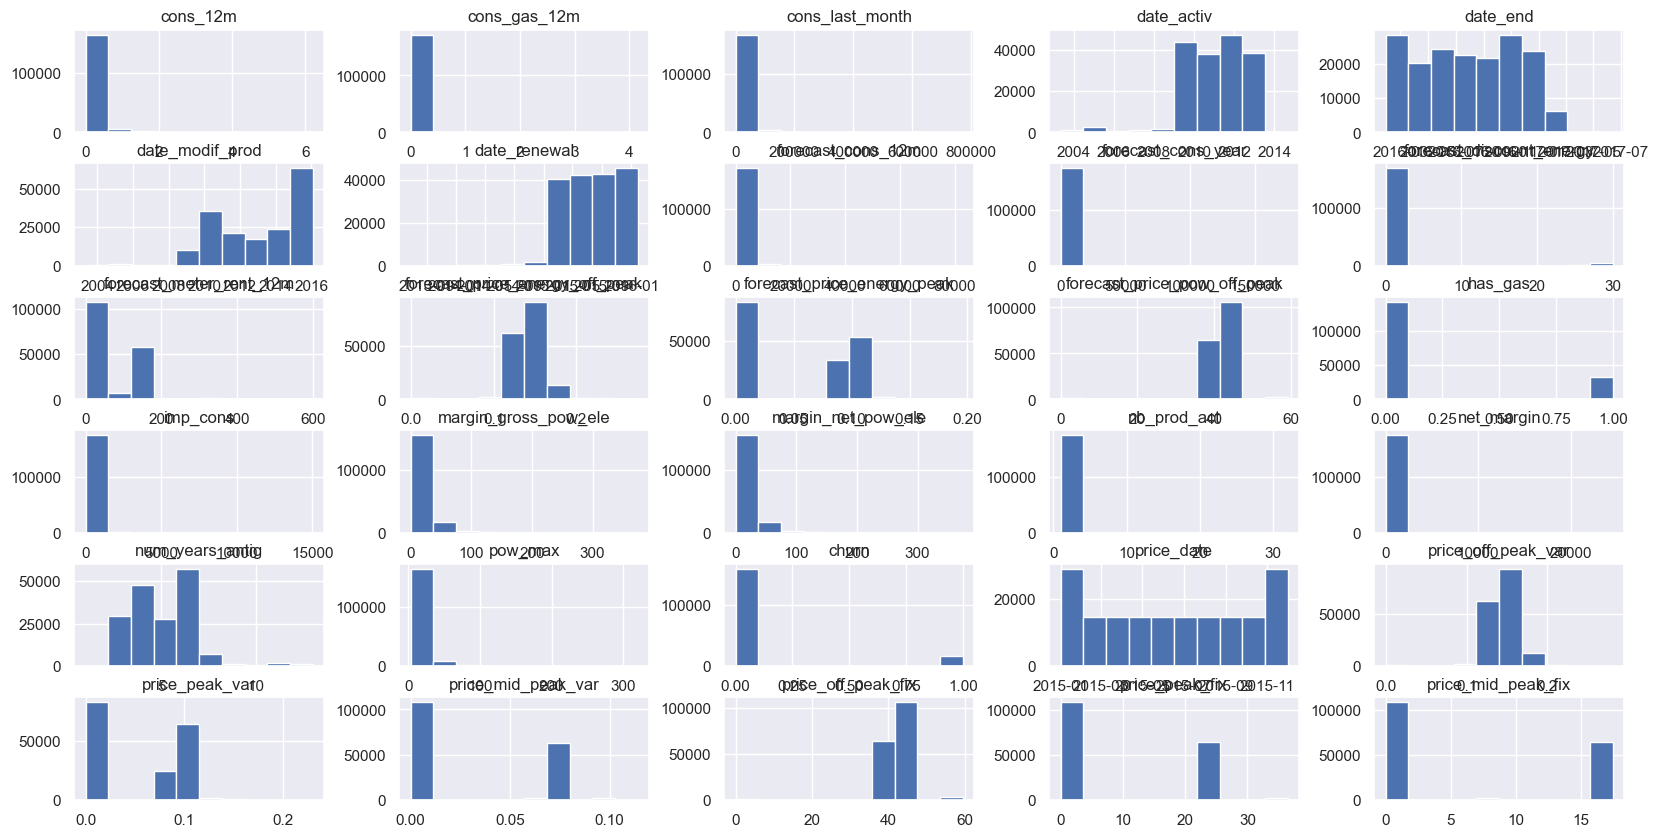

In [24]:
energy_data.hist(figsize=(20,10))
plt.show()

#### Task 2: Is Price Sensitivity Correlated with Churn?
Approach:

The client data given to us by PowerCo is cross sectional, whereas the price data is panel data. Normally, price sensitivity, or elasticity, is calculated as
 

that is, percent change in quantity over percent change in price. Since we cannot compute quantity over time, we will define price sensitivity as
 
 

where k represents a scalar for easier interpretability.

In [25]:
# Compute average energy and power price for all periods
energy_data['price_var'] = energy_data[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean(axis=1)
energy_data['price_fix'] = energy_data[['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].mean(axis=1)

# Compute total consumption
energy_data['total_cons'] = energy_data[['cons_12m', 'cons_gas_12m']].sum(axis=1)

In [26]:
energy_data[['cons_12m', 'cons_gas_12m', 'total_cons']].iloc[200:203]

,cons_12m,cons_gas_12m,total_cons
200,786536,80583,867119
201,786536,80583,867119
202,786536,80583,867119


In [28]:
price_analysis = energy_data.groupby(['id', 'price_date']).agg(
    total_cons = ('total_cons', 'mean'),
    avg_price_var = ('price_var', 'mean'),
    avg_price_fix = ('price_fix', 'mean'),
    ).reset_index()

# Multiply average prices with scalar
price_analysis['avg_price_var_scaled'] = price_analysis['avg_price_var'].mul(100_000)
price_analysis['avg_price_fix_scaled'] = price_analysis['avg_price_fix'].mul(100_000)

price_analysis.head(12)

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.0,0.100102,27.04398,10010.166667,2704397.96
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.0,0.100102,27.04398,10010.166667,2704397.96
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.0,0.102561,27.15259,10256.066667,2715259.00
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.0,0.102561,27.15259,10256.066667,2715259.00
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.0,0.102561,27.15259,10256.066667,2715259.00
5,0002203ffbb812588b632b9e628cc38d,2015-06-01,22034.0,0.102561,27.15259,10256.066667,2715259.00
6,0002203ffbb812588b632b9e628cc38d,2015-07-01,22034.0,0.102561,27.15259,10256.066667,2715259.00
7,0002203ffbb812588b632b9e628cc38d,2015-08-01,22034.0,0.098433,27.15259,9843.266667,2715259.00
8,0002203ffbb812588b632b9e628cc38d,2015-09-01,22034.0,0.098433,27.15259,9843.266667,2715259.00
9,0002203ffbb812588b632b9e628cc38d,2015-10-01,22034.0,0.098433,27.15259,9843.266667,2715259.00


In [29]:
# Compute price sensitivities and divide by scalar
price_analysis['price_sens_var'] = price_analysis['total_cons'].div(price_analysis['avg_price_var_scaled'])
price_analysis['price_sens_fix'] = price_analysis['total_cons'].div(price_analysis['avg_price_fix_scaled'])
price_analysis.head()

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115


In [30]:
# Drop rows where price is 0
price_analysis_clean = price_analysis[(price_analysis['avg_price_var'] != 0) & (price_analysis['avg_price_fix'] != 0)]
price_analysis_clean.describe()

,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix
count,1.738180e+05,173818.000000,173818.000000,173818.000000,1.738180e+05,173818.000000,173818.000000
mean,1.883994e+05,0.074779,19.642296,7477.933974,1.964230e+06,23.811564,0.099456
std,6.701382e+05,0.024311,6.172197,2431.079401,6.172197e+05,86.129076,0.369984
min,0.000000e+00,0.022727,4.980000,2272.733333,4.980000e+05,0.000000,0.000000
25%,6.183000e+03,0.049811,14.755644,4981.133333,1.475564e+06,0.937899,0.003608
50%,1.634100e+04,0.083681,14.814903,8368.133333,1.481490e+06,2.341163,0.008800
75%,5.128200e+04,0.099014,27.043980,9901.366667,2.704398e+06,6.722017,0.024414
max,6.799539e+06,0.163193,34.677296,16319.300000,3.467730e+06,1480.574633,4.589661


In [31]:
# Merge churn values
price_analysis_clean = price_analysis_clean.merge(energy_data[['id', 'price_date', 'churn']], on=['id', 'price_date'])
price_analysis_clean.head()

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147,0
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147,0
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0


In [32]:
price_churn_analysis = price_analysis_clean.groupby('id').mean().reset_index()
price_churn_analysis.head()

,id,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix,churn
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.100431,27.134488,10043.083333,2.713449e+06,2.194723,0.008120,0.0
1,0004351ebdd665e6ee664792efc4fd13,4060.0,0.048809,14.795150,4880.883333,1.479515e+06,0.831989,0.002744,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.0,0.060519,15.106570,6051.950000,1.510657e+06,1.254067,0.004926,0.0
3,00114d74e963e47177db89bc70108537,11272.0,0.049309,14.755643,4930.861111,1.475564e+06,2.286477,0.007639,0.0
4,0013f326a839a2f6ad87a1859952d227,267414.0,0.102179,27.152590,10217.950000,2.715259e+06,26.179932,0.098486,0.0


In [33]:

# Separate retained and churned clients for plotting
price_churn_analysis_0 = price_churn_analysis.query('churn == 0')
price_churn_analysis_1 = price_churn_analysis.query('churn == 1')

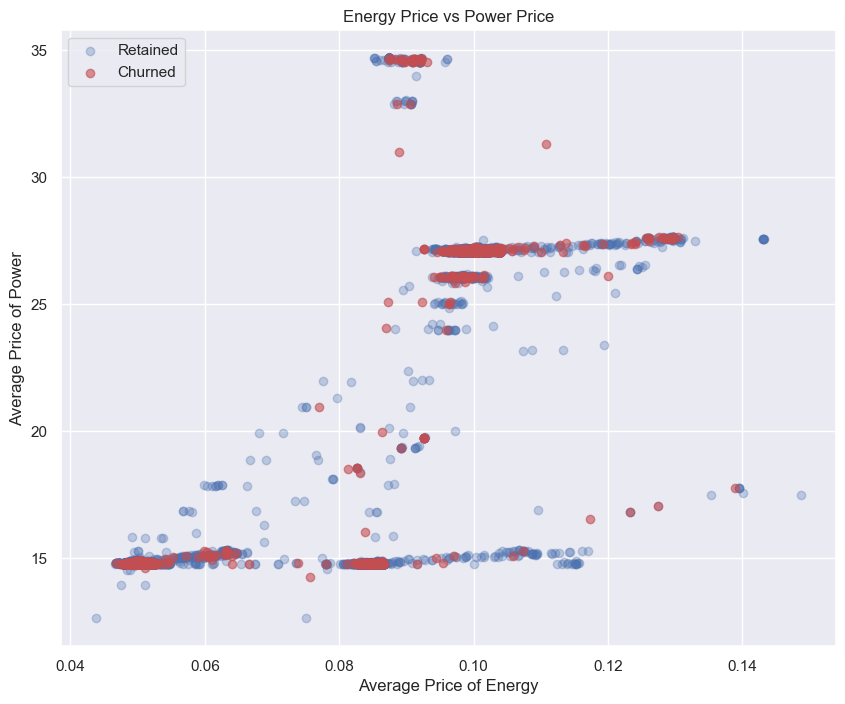

In [34]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['avg_price_var'], price_churn_analysis_0['avg_price_fix'], c='b', label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['avg_price_var'], price_churn_analysis_1['avg_price_fix'], c='r', label='Churned', alpha=0.6)

plt.xlabel('Average Price of Energy')
plt.ylabel('Average Price of Power')
plt.title('Energy Price vs Power Price')
plt.legend(loc='upper left')
plt.show()

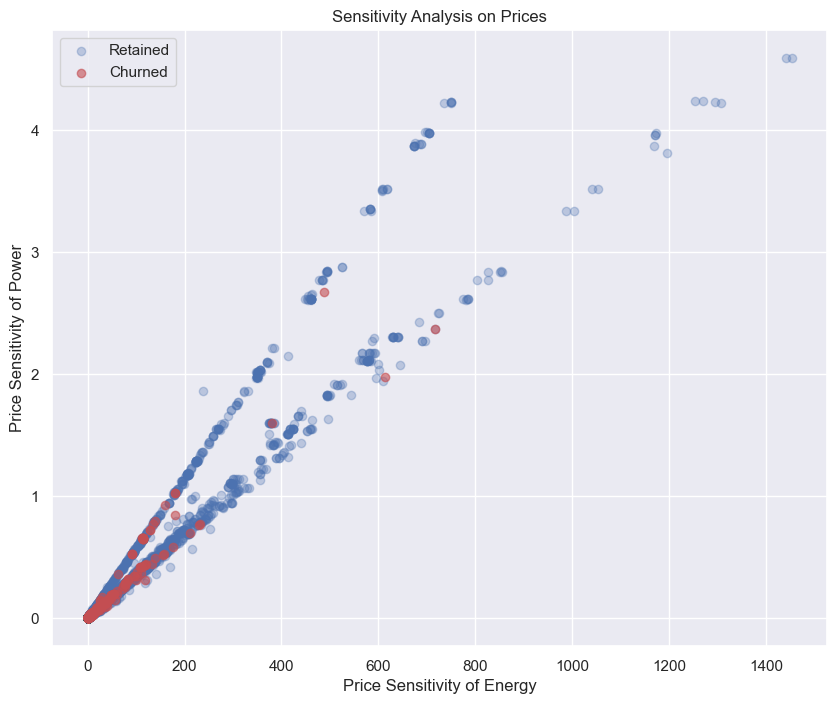

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['price_sens_var'], price_churn_analysis_0['price_sens_fix'], c='b', label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['price_sens_var'], price_churn_analysis_1['price_sens_fix'], c='r', label='Churned', alpha=0.6)

plt.xlabel('Price Sensitivity of Energy')
plt.ylabel('Price Sensitivity of Power')
plt.title('Sensitivity Analysis on Prices')
plt.legend(loc='upper left')
plt.show()

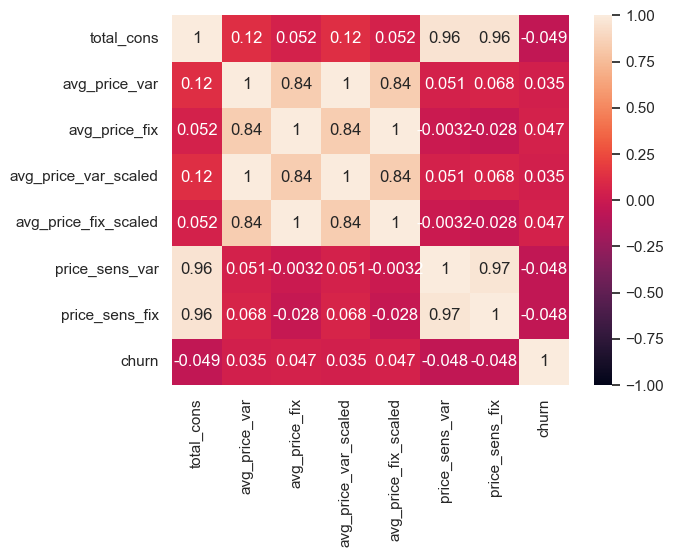

In [36]:
sns.heatmap(price_churn_analysis.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

The heatmap tells us that price sensitivity and churn have little to no correlation. However, since we had to define our own definition of price sensitivity and the scatterplots above dictate there may be some relationship, this is likely not the case.

#### Task 3: Key Findings
1. Around 9.7% of PowerCo's clients are churning.
2. It is difficult to determine whether or not price sensitivity and churn are correlated with the current data. If PowerCo has    panel data for their clients, it is possible to compute the average client price sensitivity utilizing the real formula.
3. More clients seem to churn as a result of increases in the price of energy rather than power. In other words, PowerCo could    likely get away with increasing power prices without any losing any clients.
4. Customers who churned have lower electricity and gas consumption levels than non-churners, except consumption is about even    if the client does not use gas.
5. Customers who have a higher net margin seem to churn more. Perhaps customers are more inclined to churn if their net margin    on power subscription is higher than the non-churner average? Whether or not the client uses gas does not differentiate the    groups by much in this case.
6. There doesn't seem to be much of a difference when comparing number of antiquity and churn.
7. We can see that subscribed power and total net margin seems to be an influencial factor for churn, with the former being        slightly stronger.

## Save Cleaned Data

In [37]:
energy_data.to_csv("client_data_cleaned.csv",index=False)
price_churn_analysis.to_csv("price_churn_analysis.csv",index=False)